In [1]:
import matplotlib.pyplot as plt
plt.style.use('../note.mplstyle')
import numpy as np

In [2]:
from qutip import *

# Hamiltonian

$$
H_{lab} = \sum_{j=0}^{1}{\hbar\omega_{j}\frac{\sigma_{j}^{z}}{2}} 
- J_{01}\sigma_{0}^{z}\sigma_{1}^{z}
+ \sum_{j=0}^{1}{\hbar\Omega_{j}\cos{(\omega_{MW,j}t)}\sigma_{j}^{x}}
$$

$$
H_{rot}^{RWA} 
= \sum_{j=0}^{1}{\hbar(\omega_{j}-\omega_{MW,j})\frac{\sigma_{j}^{z}}{2}} 
- J_{01}\sigma_{0}^{z}\sigma_{1}^{z}
+ \sum_{j=0}^{1}{\hbar\Omega_{j}\frac{\sigma_{j}^{x}}{2}}
$$

In [3]:
w0 = 10 * 2 * np.pi # qubit frequency
w1 = 10 * 2 * np.pi

# J01 = 0.
J_ratio = 0.005 # 0.01
J = J_ratio * min(w0,w1) # 0. # J01 # 0.
assert J >= 0.

Omega = 0.1 * 2*J

del0 = 2*J + Omega
del1 = 2.1 * del0

# del0_ratio = 2.1 # 1.3
# del0 = del0_ratio*(-1)*(2*J)# 0.
# del1 = 0. # 2*J - Omega # 0.

# Omega = 2*J - del0 # 0.2 * J



wmw0 = w0 - del0 # w0
wmw1 = w1 - del1 # w1

wR0 = Omega # 0. # 0.3 * 2 * np.pi  # Rabi amplitude
wR1 = 0. # 0.3 * 2 * np.pi  # Rabi amplitude


w = np.array([w0, w1])
wR = np.array([wR0, wR1])
wmw = np.array([wmw0, wmw1])
dels = w - wmw
assert w.size == wR.size and w.size == wmw.size
N = w.size

In [4]:
dels_over_w = np.abs(dels / w) 
print(f"dels_over_w = {dels_over_w}")
assert np.all(dels_over_w < 1e-1)

dels_over_w = [0.011  0.0231]


In [5]:
wR_over_w = np.abs(wR / w)
print(f"wR_over_w = {wR_over_w}")
assert np.all(wR_over_w < 1e-1)

wR_over_w = [0.001 0.   ]


In [6]:
dels

array([0.69115038, 1.45141581])

In [7]:
zero = Qobj(np.zeros((2,2)))

I, sigx, sigy, sigz = identity(2), sigmax(), sigmay(), sigmaz()

In [8]:
sigz_0 = tensor([sigz,I])
sigz_1 = tensor([I,sigz])
sigzlist = [sigz_0, sigz_1]

sigx_0 = tensor([sigx,I])
sigx_1 = tensor([I,sigx])
sigxlist = [sigx_0, sigx_1]

sigzsigz = tensor(sigz,sigz)

In [9]:
sigzlist[0]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]

In [10]:
sigxlist[0]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

In [11]:
w[1] - wmw[1]

1.451415805958483

In [12]:
del1

1.4514158059584845

In [13]:
w[0] - wmw[0]

0.6911503837897541

In [14]:
del0

0.6911503837897545

In [15]:
options = Options(nsteps=20000)

H0 = tensor([zero,zero])
for j in range(N):
    H0 += (w[j]-wmw[j]) * (sigzlist[j]/2.) # + wR[j] * (sigxlist[j]/2.)
H0 += (- J) * sigzsigz
    
Hdrive = tensor([zero,zero])
for j in range(N):
    Hdrive += wR[j] * (sigxlist[j]/2.)

# H0 = (- J01) * sigzsigz
# H += (- J01) * sigzsigz
H = H0 + Hdrive

In [16]:
sigzsigz

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]

In [17]:
sigzlist[0]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]

In [18]:
sigzlist[1]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

In [19]:
J

0.3141592653589793

In [20]:
H0

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.75712383  0.          0.          0.        ]
 [ 0.         -0.06597345  0.          0.        ]
 [ 0.          0.          0.69429198  0.        ]
 [ 0.          0.          0.         -1.38544236]]

In [21]:
eigvals = H0.eigenenergies()

eigvals

array([-1.38544236, -0.06597345,  0.69429198,  0.75712383])

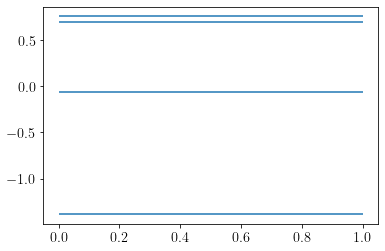

In [22]:
fig, ax = plt.subplots()

ax.hlines(eigvals, 0, 1)

In [23]:
Omega

0.06283185307179587

In [24]:
eigvals[3] - eigvals[2]

0.06283185307179551

In [25]:
eigvals[3] - eigvals[0]

2.142566189748237

In [26]:
Omega

0.06283185307179587

In [27]:
2*J

0.6283185307179586

In [28]:
del1

1.4514158059584845

In [29]:
abs(del1) - 2*J

0.8230972752405259

In [30]:
eigvals

array([-1.38544236, -0.06597345,  0.69429198,  0.75712383])

# [TODO] Add rwa-free solution

In [31]:
E_00 = -J -(1/2.)*(del0+del1)
E_11 = -J +(1/2.)*(del0+del1)
E_01 = +J +(1/2.)*(-del0+del1)
E_10 = +J -(1/2.)*(-del0+del1)
for eigval, label in zip((E_00, E_11, E_10, E_01),("00","11","10","01")):
    print(f"E_{label} = {eigval}")
eigvals_ana = np.array([E_00, E_11, E_01, E_10])
eigvals_ana.sort()
eigvals_ana

E_00 = -1.3854423602330987
E_11 = 0.7571238295151401
E_10 = -0.06597344572538572
E_01 = 0.6942919764433444


array([-1.38544236, -0.06597345,  0.69429198,  0.75712383])

In [32]:
eigvals_ana - eigvals

array([-8.88178420e-16, -6.10622664e-16,  6.66133815e-16,  8.88178420e-16])

In [33]:
Omega

0.06283185307179587

In [34]:
eigvals[3] - eigvals[2]

0.06283185307179551

In [35]:
# T_pi = np.pi / (wR[0])

tmax = 50 # 20 # 10. # T_pi # 10
t = np.linspace(0,tmax,201)

In [36]:
sigvec = [sigx,sigy,sigz]

c_ops = []

In [37]:
rho_00_00 = ket2dm(tensor([basis(2,1),basis(2,1)])) # ket2dm(tensor([basis(2,0),basis(2,0)]))

# rho_00_00

# fidelity(rho_00_00, rho_00_00)

# rho_t0 = rho_00_00

def fidel_00_00(t, rho):
#     _rho_00_00 = ket2dm(tensor([basis(2,0),basis(2,0)]))
    return fidelity(rho_00_00, rho)

# fidel_00_00(_, rho_00_00)

res_00_00 = mesolve(H, rho_00_00, t, c_ops, fidel_00_00, options=options)

assert not np.any(np.abs(np.imag(res_00_00.expect)).max() > 1e-15)
fidel_00_00_from_00_00 = np.real(res_00_00.expect)

In [38]:
rho_01_01 = ket2dm(tensor([basis(2,1),basis(2,0)])) # ket2dm(tensor([basis(2,0),basis(2,1)]))

# rho_t0 = rho_01_01

rho_11_11 = ket2dm(tensor([basis(2,0),basis(2,0)])) # ket2dm(tensor([basis(2,1),basis(2,1)]))
def fidel_11_11(t, rho):
#     rho_11_11 = ket2dm(tensor([basis(2,1),basis(2,1)]))
    global rho_11_11
    return fidelity(rho_11_11, rho)

res_01_01 = mesolve(H, rho_01_01, t, c_ops, fidel_11_11, options=options)

assert not np.any(np.abs(np.imag(res_01_01.expect)).max() > 1e-15)
fidel_11_11_from_01_01 = np.real(res_01_01.expect)

# [TODO] Compare the `fidelity()` function in `qutip` and the analytical calculation for some density operators

In [39]:
w

array([62.83185307, 62.83185307])

In [40]:
wmw

array([62.14070269, 61.38043727])

In [41]:
Omega

0.06283185307179587

In [42]:
J

0.3141592653589793

In [43]:
params = (f"w0-{w[0]:.4g}-w1-{w[1]:.4g}-wmw0-{wmw[0]:.4g}-wmw1"
          f"-{wmw[1]:.4g}-wR0-{wR[0]:.4g}-wR1-{wR[1]:.4g}-J-{J:.4g}-tmax-{tmax}")
params

'w0-62.83-w1-62.83-wmw0-62.14-wmw1-61.38-wR0-0.06283-wR1-0-J-0.3142-tmax-50'

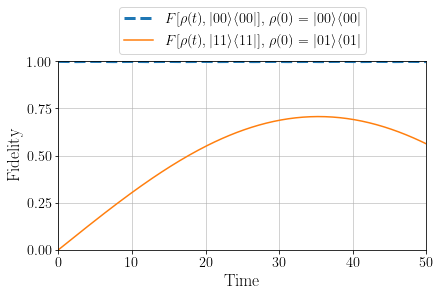

In [44]:
fig, ax = plt.subplots(constrained_layout=True)

l_00_from_00, = ax.plot(t, fidel_00_00_from_00_00, lw=3, ls='--')
l_11_from_01, = ax.plot(t, fidel_11_11_from_01_01)
ax.set_xlim(t[[0,-1]])
ax.set_ylim(0,1)
ax.set_xlabel(r"Time")
ax.set_ylabel("Fidelity")
ax.legend(
    [l_00_from_00, l_11_from_01], 
    [r"$F[\rho(t), |00\rangle\langle 00|]$, $\rho(0)=|00\rangle\langle 00|$", 
     r"$F[\rho(t), |11\rangle\langle 11|]$, $\rho(0)=|01\rangle\langle 01|$"],
    loc='lower center',
    bbox_to_anchor=(0.5,1)
)
ax.yaxis.set_ticks([0,0.25,0.5,0.75,1])
ax.grid(True, alpha=0.75, lw=0.75)
ax.set_axisbelow(True)
# fig.savefig(f"fidelities-test-019-{params}.png")